# Standard Lotka-Volterra equations

Premi ctrl + F9 per eseguire il codice

We consider the scaled Lotka-Volterra (LV) predator-prey model for a system involving two species, which is represented by the following system of coupled first-order coupled differential equations

$$
\begin{array}{ll}
&&\frac{d\,X_1}{d\,T}= \,X_1\,X_2 - X_1 \ \ \\
&&\frac{d\,x_2}{d\,t}= -X_1 \, X_2 + r \, X_2 \ \
\end{array}
$$

where the positive functions $X_1=X_1(T)$ and $X_2=X_2(T)$ represent the predator and the pray populations, respectively, while $r$ is a positive constant.


In [1]:
# First let us import all python libraries needed.

%matplotlib inline
from scipy.special import lambertw
import numpy as np
import pylab as p
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from scipy import integrate
import ipywidgets as ipw

## Problem reformulation

We rewrite the previous equation as

$$
\begin{array}{ll}
&&\dot{X_1} = X_1\,X_2 - X_1 \ \ \\
&&\dot{X_2}= -X_1 \, X_2 + r \, X_2 \ \
\end{array}
$$

where $\dot{X_1}=\frac{d\,X_1}{d\,T}$ and $\dot{X_2}=\frac{d\,X_2}{d\,T}$.

Now, we pose (for numerical issues)

$$X=\left(
\begin{array}{ll}
X_1 \\
X_2
\end{array}
\right)
$$

and

$$\dot{X}= \left(
\begin{array}{ll}
\dot{X}_1 \\
\dot{X}_2
\end{array}
\right) = \left(
\begin{array}{ll}
X_1\,X_2 - X_1 \\
-X_1 \, X_2 + r \, X_2
\end{array}
\right)
$$

## Numerical simulation

## Settings

In [120]:
# Coefficients
r = 0.8

# Initial condition
X10 = 2.
X20 = 2.

# Time parameters
time_samples = 1000
time_max = 20.

# Define the standard Lotka-Volterra model
def standard_Lotka_Volterra_equation(X, t, r):
    X1, X2 = X
    dotX1 = X1 * X2 - X1
    dotX2 = -X1 * X2 + r * X2
    return np.array([dotX1, dotX2])
    
# Solving the standard Lotka-Volterra model with odeint numerical method
t = np.linspace(0.,time_max, time_samples)
X0 = [X10, X20]
res = integrate.odeint(standard_Lotka_Volterra_equation, X0, t, args = (r,))
X1, X2 = res.T

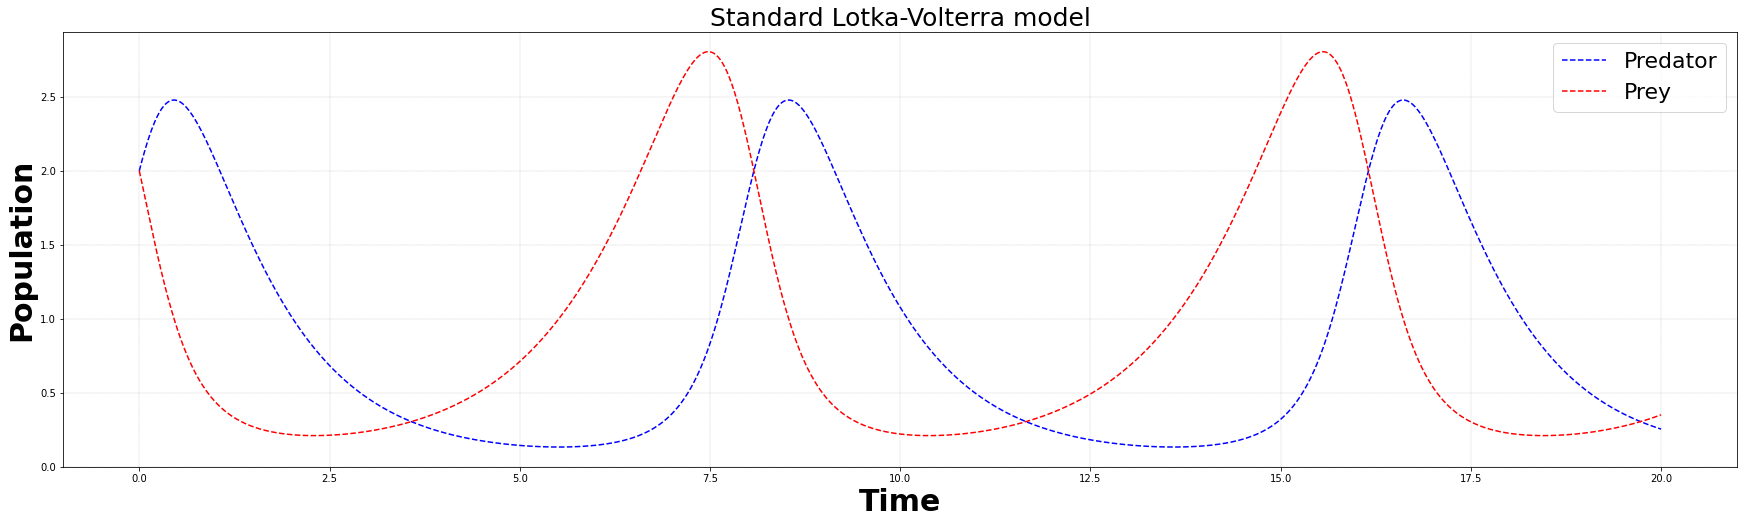

In [122]:
plt.figure(figsize=(30,8))
plt.grid()
plt.title('Standard Lotka-Volterra model')
plt.plot(t, X1, '--b', label = 'Predator')
plt.plot(t, X2, '--r', label = "Prey")
plt.xlabel('Time', fontsize=30, fontweight='bold')
plt.ylabel('Population', fontsize=30, fontweight='bold')
plt.legend(loc ="upper right", fontsize=22)
plt.rc('axes', titlesize=25)                           # fontsize of the axes title
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.2)   # grid
plt.show()

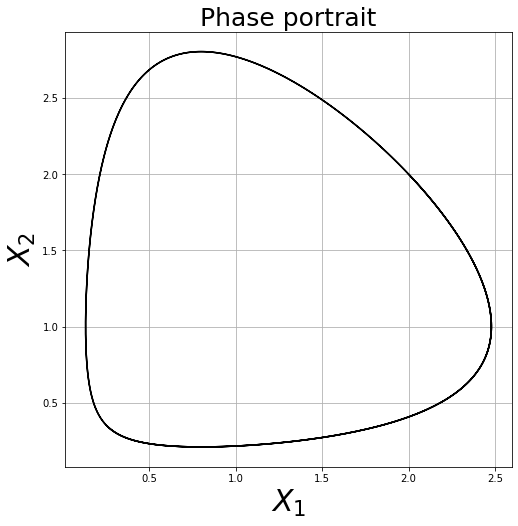

In [123]:
plt.figure(figsize=(8,8))
plt.grid()
plt.title("Phase portrait")
plt.plot(X1, X2, '-k')
plt.xlabel('$X_1$', fontsize=30, fontweight='bold')
plt.ylabel('$X_2$', fontsize=30, fontweight='bold')
plt.show()

## Phase portrait 

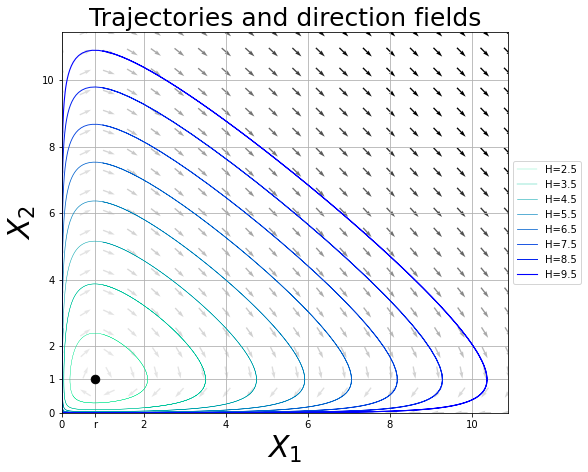

In [225]:
plt.figure(figsize=(10,7))

IC=np.linspace(2.5, 9.5, 8)
for H, cont in zip(np.linspace(2.5, 9.5, 8), np.linspace(0, 7, 8).astype(int)):
    IC[cont] = np.real(-lambertw(-np.exp(1-H),k=-1))

vcolors = plt.cm.winter_r(np.linspace(0.1, 1., len(IC)))
#for prey in IC:
for prey, col in zip(IC, vcolors):  
    X0 = [1.0,prey]
    Xs = integrate.odeint(standard_Lotka_Volterra_equation, X0, t, args = (r,))
    H = X0[0] - r*np.log(X0[0]) + X0[1] - np.log(X0[1])
    #p.plot( Xs[:,0], Xs[:,1], lw=.1*prey, color=col, label='$X_{10}$=%.f, $X_{20}$=%.f' % ( X0[0], X0[1]) )
    p.plot( Xs[:,0], Xs[:,1], lw=.1*prey, color=col, label='H=%.1f' % (H,) )
plt.xlabel('$X_1$', fontsize=30, fontweight='bold')
plt.ylabel('$X_2$', fontsize=30, fontweight='bold')
plt.legend()
# Put a legend to the right of the current axis
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))


def dX_dt(X, t=0):
    """ Return the growth rate of fox and rabbit populations. """
    return np.array([ X[0]*X[1] - X[0],
                  -X[0]*X[1] + r*X[1]])
    
X_f0 = np.array([0.,  0.])
X_f1 = np.array([ 0., r])
all(dX_dt(X_f0) == np.zeros(2) ) and all(dX_dt(X_f1) == np.zeros(2)) # => True
    
#-------------------------------------------------------
# define a grid and compute direction at each point
ymax = p.ylim(ymin=0)[1]                        # get axis limits
xmax = p.xlim(xmin=0)[1]
nb_points   = 20

x = np.linspace(0, xmax, nb_points)
y = np.linspace(0, ymax, nb_points)

X, Y = np.meshgrid(x, y)                       # create a grid

#X1 , Y1  = meshgrid(x, y)                       # create a grid
DX1, DY1 = dX_dt([X, Y])                      # compute growth rate on the gridt
M = (np.hypot(DX1, DY1))                           # Norm of the growth rate 
M[ M == 0] = 1.            
DX1 /= M                                      # Normalize each arrows
DY1 /= M

#-------------------------------------------------------
# Drow direction fields, using matplotlib 's quiver function
# I choose to plot normalized arrows and to use colors to give information on
# the growth speed
p.title('Trajectories and direction fields')
# getting the original colormap using cm.get_cmap() function
original_map=plt.cm.get_cmap('binary')


# reversing the original colormap using reversed() function
reversed_map = original_map.reversed()
Q = p.quiver(X, Y, DX1, DY1, M, cmap=original_map, pivot='mid')
p.grid()
p.xlim(0, xmax)
p.ylim(0, ymax)
cb=p.colorbar(Q, p.clim(-10,100));
cb.remove() 

plt.plot(r,1,'k.',markersize=17)
plt.xticks([0, 0.8, 2, 4, 6, 8, 10],['0','r', '2', '4', '6', '8', '10']);  # Set label locations.
plt.yticks([0, 1.0, 2, 4, 6, 8, 10],['0','1', '2', '4', '6', '8', '10']);  # Set label locations.
#plt.xticks(np.arange(12),['0','r','1', '2', '3', '4', '5', '6', '7', '8', '9', '10']); # Set text labels.